In [46]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rc
import pylab
import seaborn as sns

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing price response functions

In [48]:
tsla_df = pd.read_csv('../data/market_orders/TSLA-2016-R1.csv', header=0,index_col=0)
ebay_df = pd.read_csv('../data/market_orders/EBAY-2016-R1.csv', header=0,index_col=0)

In [49]:
from liquidity.response_functions.price_response_functions import compute_conditional_aggregate_impact
from liquidity.response_functions.price_response_functions import compute_price_response

In [50]:

SAMPLE_LAG = 100
ACF_RANGE = 1001
tsla_100 = compute_conditional_aggregate_impact(tsla_df, T=SAMPLE_LAG)
ebay_100 = compute_conditional_aggregate_impact(ebay_df, T=SAMPLE_LAG)

In [51]:
tsla_100.describe()

,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R100
count,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7.576000e+03,7576.000000,7576.000000
mean,208.625695,2.224214,-2.342526,-0.040655,0.024219,3.615686e+05,3590.626980,-0.001173
std,23.926687,30.615437,35.970179,0.999239,0.020078,1.799494e+05,1582.391274,0.931059
min,144.830000,-204.946257,-259.645719,-1.000000,-0.109997,8.077400e+04,962.000000,-19.100000
25%,193.805000,-12.008908,-22.668697,-1.000000,0.018343,2.383570e+05,2475.000000,-0.365000
50%,207.175000,1.370815,-1.495887,-1.000000,0.023188,3.092610e+05,3171.000000,0.000000
75%,223.727500,16.252593,18.282880,1.000000,0.028822,4.393330e+05,4370.000000,0.350000
max,267.315000,431.529295,201.552866,1.000000,0.140840,1.134392e+06,9210.000000,12.135000


In [52]:
tsla_df_lo = pd.read_csv('../data/limit_orders/TSLA-2016-R1-LO.csv', header=0,index_col=0)

In [53]:
tsla_100_lo = compute_conditional_aggregate_impact(tsla_df_lo, T=SAMPLE_LAG)

In [54]:
tsla_100_lo.describe()

,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R100
count,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3.468000e+03,3468.000000,3468.000000
mean,211.492950,7.186942,7.911859,-0.044983,-0.010559,2.430010e+06,24666.205017,-0.008179
std,10.141601,109.604320,97.650769,0.999132,0.002169,4.801195e+05,5531.123074,0.400838
min,194.235000,-768.851448,-481.594773,-1.000000,-0.016702,6.079310e+05,6233.000000,-16.725000
25%,200.655000,-26.877748,-28.215222,-1.000000,-0.012363,2.349995e+06,21165.000000,-0.065000
50%,207.600000,-1.981517,0.000000,-1.000000,-0.010221,2.356132e+06,24226.000000,0.000000
75%,221.760000,37.179111,36.654148,1.000000,-0.008865,2.406590e+06,25091.000000,0.065000
max,225.565000,784.039675,756.511896,1.000000,-0.004414,3.158604e+06,33340.000000,4.185000


## Testing prepare data for fitting

In [55]:
from liquidity.util.fitting_util import prepare_data_for_fitting

In [56]:
MO_LAG_INTERVALS = (5, 10, 20, 50, 100)

In [57]:
tsla_df.head()

,event_timestamp,trade_sign,side,lob_action,order_executed,execution_price,execution_size,ask,bid,midprice,ask_volume,bid_volume,price_changing,midprice_change,R1,norm_trade_volume
0,2016-01-04 10:30:02.487834868,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
1,2016-01-04 10:30:02.594369706,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
2,2016-01-04 10:30:02.602151380,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,200.0,100.0,True,-0.095,0.095,0.708122
3,2016-01-04 10:30:02.627167275,-1,BID,REMOVE,True,221.27,25,221.36,221.27,221.315,200.0,25.0,True,-0.010,0.010,0.177031
4,2016-01-04 10:30:02.895123534,-1,BID,REMOVE,True,221.25,100,221.36,221.25,221.305,100.0,100.0,True,-0.090,0.090,0.708122


In [58]:
results_tsla_df = prepare_data_for_fitting(tsla_df, durations=MO_LAG_INTERVALS)
results_tsla_df.head()

,vol_imbalance,T,R
0,-147.582272,5.0,-0.045
1,-140.637441,5.0,-0.010
2,-140.377883,5.0,-0.010
3,-121.687238,5.0,-0.010
4,-111.971303,5.0,0.000


In [59]:
MO_LAG_INTERVALS = (5, 10, 20, 50, 100)

In [60]:
from liquidity.response_functions.fitting import normalise_axis

results_ = []
for i, T in enumerate(MO_LAG_INTERVALS):
    lag_data = compute_conditional_aggregate_impact(tsla_df, T=T)
    lag_data['R'] = lag_data[f'R{T}']
    lag_data = lag_data.drop(columns=f'R{T}')
    lag_data['T']= T
    results_.append(lag_data)

tsla_data = pd.concat(results_)
tsla_data_norm = normalise_axis(tsla_data)

In [61]:
results_[0]

,event_timestamp,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R,T
0,2016-01-04 10:30:02.487834868,221.410,-2.161416,-2.987662,-1,0.027301,503438,6009,-0.195,5
1,2016-01-04 10:30:24.785387196,221.215,1.227939,1.792597,-1,0.027301,503438,6009,-0.010,5
2,2016-01-04 10:30:39.776241277,221.205,2.217387,2.987662,1,0.027301,503438,6009,0.020,5
3,2016-01-04 10:30:39.777548678,221.225,0.319612,0.597532,1,0.027301,503438,6009,0.000,5
4,2016-01-04 10:30:53.912685027,221.225,0.688481,1.792597,-1,0.027301,503438,6009,0.010,5
...,...,...,...,...,...,...,...,...,...,...
151514,2016-12-30 14:54:46.729172000,212.955,1.563543,4.301804,1,0.019189,219620,2504,-0.015,5
151515,2016-12-30 14:54:56.324175284,212.940,-2.055032,-4.301804,-1,0.019189,219620,2504,-0.335,5
151516,2016-12-30 14:56:22.339614831,212.605,1.400846,-1.433935,1,0.019189,219620,2504,0.085,5
151517,2016-12-30 14:57:33.988238277,212.690,-1.265825,-1.433935,-1,0.019189,219620,2504,-0.040,5


# Test response functions

In [62]:
tsla_df.head()

,event_timestamp,trade_sign,side,lob_action,order_executed,execution_price,execution_size,ask,bid,midprice,ask_volume,bid_volume,price_changing,midprice_change,R1,norm_trade_volume
0,2016-01-04 10:30:02.487834868,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
1,2016-01-04 10:30:02.594369706,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
2,2016-01-04 10:30:02.602151380,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,200.0,100.0,True,-0.095,0.095,0.708122
3,2016-01-04 10:30:02.627167275,-1,BID,REMOVE,True,221.27,25,221.36,221.27,221.315,200.0,25.0,True,-0.010,0.010,0.177031
4,2016-01-04 10:30:02.895123534,-1,BID,REMOVE,True,221.25,100,221.36,221.25,221.305,100.0,100.0,True,-0.090,0.090,0.708122


In [63]:
R1 = compute_price_response(tsla_df)
R1.head()

,midprice,sign,daily_R1,R1
0,221.410,-1,0.027301,0.000
1,221.410,-1,0.027301,0.000
2,221.410,-1,0.027301,-0.095
3,221.315,-1,0.027301,-0.010
4,221.305,-1,0.027301,-0.090


In [64]:
R1 = compute_price_response(tsla_df, lag=4)
R1.head()

,midprice,sign,daily_R1,R4
0,221.410,-1,0.027301,-0.105
1,221.305,-1,0.027301,-0.105
2,221.200,1,0.027301,0.005
3,221.205,1,0.027301,0.020
4,221.225,1,0.027301,0.000


In [65]:
R1 = compute_price_response(tsla_df, lag=4, normalise=True)
R1.head()

,midprice,sign,daily_R1,R4
0,221.410,-1,0.027301,-0.093019
1,221.305,-1,0.027301,-0.093019
2,221.200,1,0.027301,0.004429
3,221.205,1,0.027301,0.017718
4,221.225,1,0.027301,0.000000


#  Fitting process

In [72]:
from liquidity.util.fitting_util import get_agg_features

tsla_data = get_agg_features(tsla_df, MO_LAG_INTERVALS)

In [73]:
tsla_data.head()

,event_timestamp,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R,T
0,2016-01-04 10:30:02.487834868,221.410,-2.161416,-2.987662,-1,0.027301,503438,6009,-0.195,5
1,2016-01-04 10:30:24.785387196,221.215,1.227939,1.792597,-1,0.027301,503438,6009,-0.010,5
2,2016-01-04 10:30:39.776241277,221.205,2.217387,2.987662,1,0.027301,503438,6009,0.020,5
3,2016-01-04 10:30:39.777548678,221.225,0.319612,0.597532,1,0.027301,503438,6009,0.000,5
4,2016-01-04 10:30:53.912685027,221.225,0.688481,1.792597,-1,0.027301,503438,6009,0.010,5


In [66]:
from liquidity.response_functions.fitting import bin_data_into_quantiles, get_fit_params

binned_data = []

for T in MO_LAG_INTERVALS:
    result = tsla_data_norm[tsla_data_norm['T']==T][['vol_imbalance', 'T', 'R']]
    binned_data.append(bin_data_into_quantiles(result))
binned_result = pd.concat(binned_data)

popt_tsla, pcov_tsla, fit_func = get_fit_params(binned_result)

In [67]:
popt_tsla

array([6.09220194e-01, 1.18203873e+00, 1.35030002e-01, 6.00137556e+00,
       5.35660371e+08])

In [68]:
fit_param = {}
for T in MO_LAG_INTERVALS:
    result = tsla_data_norm[tsla_data_norm['T']==T][['vol_imbalance', 'T', 'R']]

    binned_result = bin_data_into_quantiles(result, q=100)
    param = get_fit_params(binned_result)
    if param[0] is None:
        print('re-trying')
        binned_result = bin_data_into_quantiles(result, q=31)
        param = get_fit_params(binned_result)
    fit_param[T] = param

Optimal parameters not found: The maximum number of function evaluations is exceeded
re-trying
Optimal parameters not found: The maximum number of function evaluations is exceeded
re-trying
Optimal parameters not found: The maximum number of function evaluations is exceeded


In [69]:
fit_param[5]

(array([6.59082618, 0.04032086, 3.37415375, 1.31856471, 2.98858001]),
 array([[ 7.69018345e+15,  3.79197711e+15,  0.00000000e+00,
          0.00000000e+00, -1.87501183e+16],
        [ 3.79197711e+15,  3.18146486e+15,  0.00000000e+00,
          0.00000000e+00, -2.93652533e+15],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [-1.87501183e+16, -2.93652533e+15,  0.00000000e+00,
          0.00000000e+00,  7.60623454e+16]]),
 <function liquidity.response_functions.fitting.scaling_form(qT, chi, kappa, alpha, beta, gamma)>)

/Users/ana_bugaenko/workspace/another_workspace/liquidity/liquidity/util/plotting/plot_aggrate_impact.py:253: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(q, fit_param[T][2](np.array([q, T]), *popt),


IndexError: list index out of range

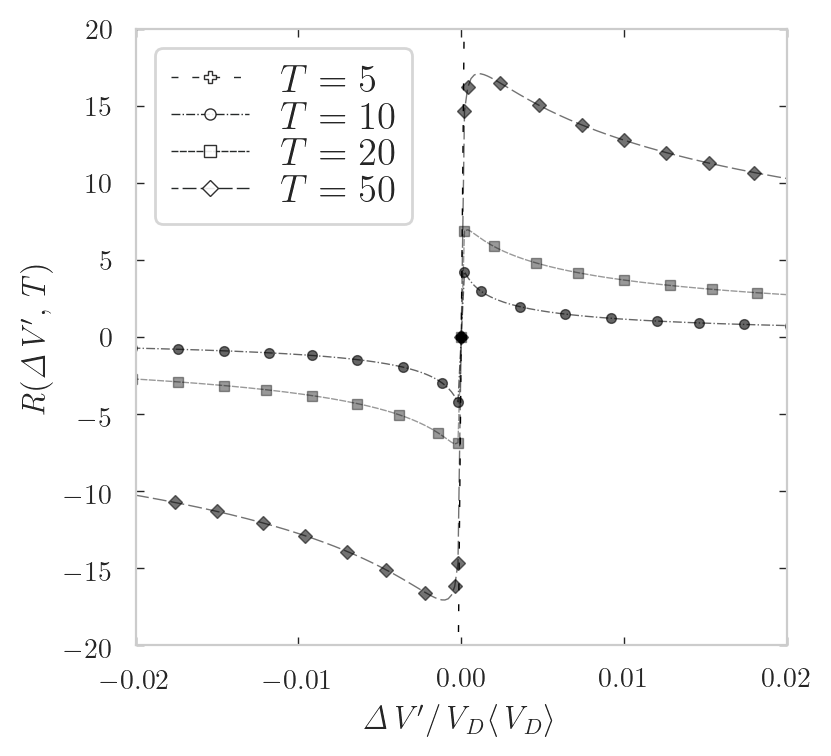

In [70]:
from liquidity.util.plotting.plot_aggrate_impact import plot_collapsed_fitted_func

plot_collapsed_fitted_func(fit_param,
                           line_color='black', markers_color='black',
                           xlim=0.02, ylim=20, renorm=False,
                           durations=MO_LAG_INTERVALS)